<a href="https://colab.research.google.com/github/tadashi000000/googlecolab001/blob/main/machinelearning002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データの準備

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)

x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

モデル構築

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(16, input_dim=4)) # 4つの特徴が入力なので、入力の数は4、ニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加

model.add(Dense(16)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加

model.add(Dense(3)) # 3つに分類するので、ニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 403
Trainable params: 403
Non-trainable params: 0
________________________________________________________

学習

In [4]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0657 - accuracy: 0.3750
Epoch 2/30
14/14 [==============================] - 0s 1ms/step - loss: 0.9612 - accuracy: 0.5625
Epoch 3/30
14/14 [==============================] - 0s 1ms/step - loss: 0.8812 - accuracy: 0.6339
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6518
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7626 - accuracy: 0.6875
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7146 - accuracy: 0.7500
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6704 - accuracy: 0.7768
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.8125
Epoch 9/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.8125
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.8214
Epoch 11/30
14/14 [

学習の推移

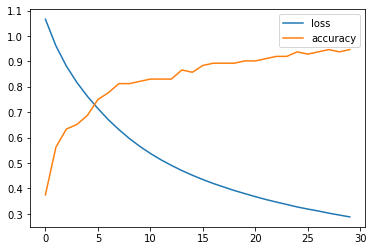

In [5]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 訓練用データの精度（正解率）

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')  # 誤差
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')  # 精度（正解率）
plt.legend()
plt.show()

評価

In [6]:
loss, accuracy = model.evaluate(x_test, t_test)
print("誤差:", loss, "精度", accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.9211
誤差: 0.28753265738487244 精度 0.9210526347160339


予測

In [7]:
y_test = model.predict(x_test)
print(y_test)

[[0.94240415 0.04537014 0.01222571]
 [0.9580541  0.03371584 0.00823002]
 [0.9665178  0.02669417 0.0067881 ]
 [0.9444044  0.04786326 0.00773234]
 [0.00496254 0.17397201 0.8210654 ]
 [0.01734674 0.2850205  0.6976328 ]
 [0.9550353  0.03962902 0.00533561]
 [0.00602077 0.17787255 0.8161067 ]
 [0.09861405 0.5322466  0.36913934]
 [0.00228168 0.07215272 0.92556554]
 [0.0113311  0.27168185 0.7169871 ]
 [0.15824942 0.6349507  0.20679985]
 [0.9372987  0.0501465  0.01255473]
 [0.00386055 0.07640982 0.9197296 ]
 [0.9508221  0.0424027  0.00677519]
 [0.00562413 0.1358819  0.858494  ]
 [0.03048568 0.58858794 0.3809264 ]
 [0.01778914 0.38098854 0.6012223 ]
 [0.10338517 0.5557637  0.34085113]
 [0.9786388  0.01711684 0.00424435]
 [0.05565879 0.45242092 0.49192026]
 [0.96398896 0.0289133  0.00709766]
 [0.9315881  0.05984922 0.00856276]
 [0.0010206  0.06235062 0.93662876]
 [0.22943781 0.6773276  0.09323455]
 [0.2099205  0.67263055 0.11744902]
 [0.0037738  0.10125599 0.89497024]
 [0.12570912 0.58913845 0.28